<a href="https://colab.research.google.com/github/anand-therattil/machine_learning/blob/main/pytorch_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I have created this colab notebook to learn the deep learning using [PyTorch by Partrick Loeber](https://youtu.be/exaWOE8jvy8?si=AGBT7Nr61MBT9nhW)

Installation of pytorch in google colab can be done using ``` !pip install torch ```

To check if the pytorch is installed run this if there are no Error then the pytorch is installed successfully
Else go the https://pytorch.org/

In [ ]:
import torch
torch.cuda.is_available()  # to check if cuda/ GPU is available if False then cuda is not present True if present

False

Basic Defining

In [ ]:
# Random tensor
# torch.rand(dimension,dtype )
x = torch.rand(3)
print(x)

# Empty tensor
# torch.empty(dimension,dtype)
# Here empty tensor means there will be a value however it will in the value ranged in e^-10 (depends on the system )
x = torch.empty(1,2)
print(x)

# Ones tensor
# torch.ones(dimension,dtype)
x = torch.ones(1,4)
print(x)

# to check the size of a tensor we can use the x.size()
print(x.size())


tensor([0.7581, 0.4986, 0.0113])
tensor([[0., 0.]])
tensor([[1., 1., 1., 1.]])
torch.Size([1, 4])


Basic Operations
1. I have show for addition similar can be applicable for the
subtraction, multiplication, division and modulus.
2. Reshaping of the tensor using the ``` view()```

In [ ]:
x = torch.rand(2,2)
y = torch.ones(2,2)

print(x+y)
# Or
print(torch.add(x,y))


# Inplace Operation
y.add_(x) # Inplace addition
print(y)

# Reshaping of the tensor vector
# Keep in mind that while reshaping the present dimension should match with the current dimension
# However if the dimension is set as -1 the object automotically defines it
print(y.view(4,1))
print(y.view(-1,4))
print(y.view(4,-1))

tensor([[1.9123, 1.2155],
        [1.7478, 1.0974]])
tensor([[1.9123, 1.2155],
        [1.7478, 1.0974]])
tensor([[1.9123, 1.2155],
        [1.7478, 1.0974]])
tensor([[1.9123],
        [1.2155],
        [1.7478],
        [1.0974]])
tensor([[1.9123, 1.2155, 1.7478, 1.0974]])
tensor([[1.9123],
        [1.2155],
        [1.7478],
        [1.0974]])


Conversion to Numpy and vice versa

In [ ]:
import numpy as np
a = torch.rand(3,3)
b = a.numpy()
print(type(a))
print(type(b))
# However in this approach the if the value of a changes the value of b changes

a = torch.rand(3,3)
b = torch.from_numpy(a.numpy())
print(type(a))
print(type(b))

# In this the one the tensor are the cpu tensor however if the tensor is on the GPU then need to convert to cpu first then can be used for the for the numpy
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")
a.to(device)
z =a + b
z.to("cpu") # To make it back  to normal tensor
z = torch.from_numpy(z.numpy())
z = z.numpy()


<class 'torch.Tensor'>
<class 'numpy.ndarray'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


Calculation of Gradient through Backwards Propogation

In [ ]:
x = torch.rand(3,requires_grad =True)
print(x)

y = x + 2
print(y)

z = y*y*2
print(z)
# z = z.sum()
z.backward(torch.tensor([1,1,3]))

print(x.grad)

tensor([0.1230, 0.5288, 0.7583], requires_grad=True)
tensor([2.1230, 2.5288, 2.7583], grad_fn=<AddBackward0>)
tensor([ 9.0140, 12.7896, 15.2160], grad_fn=<MulBackward0>)
tensor([ 8.4919, 10.1152, 33.0992])


In [ ]:
x = torch.rand(3,requires_grad =True)
print(x)

y = x.detach() + 2
print(y)

z = y*y*2
print(z)
# z = z.sum()
# z.backward(torch.tensor([1,1,3]))

print(x.grad)

tensor([0.8013, 0.3743, 0.1006], requires_grad=True)
tensor([2.8013, 2.3743, 2.1006])
tensor([15.6944, 11.2744,  8.8247])
None


In [ ]:
weights = torch.ones(4,requires_grad=True)
print(weights)

for i in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_()

tensor([1., 1., 1., 1.], requires_grad=True)
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [ ]:
weights = torch.ones(4,requires_grad=True)
print(weights)

for i in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_()

tensor([1., 1., 1., 1.], requires_grad=True)
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [ ]:
import torch
import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4]], dtype= torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype= torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)
input_size, output_size  = n_features, n_features
model = nn.Linear(input_size,output_size)

learning_rate = 0.01
n_iters = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr= learning_rate)

for epoch in range(n_iters):
  y_pred = model(X)

  l = loss(Y, y_pred)

  l.backward()

  optimizer.step()

  optimizer.zero_grad()

  if(epoch %10 ==0):
    [w,b] = model.parameters()
    print('epoch: '+str(epoch+1)+ " w:" +str(w)+" loss: "+str(l))




4 1
epoch: 1 w:Parameter containing:
tensor([[0.4791]], requires_grad=True) loss: tensor(28.2055, grad_fn=<MseLossBackward0>)
epoch: 11 w:Parameter containing:
tensor([[1.6973]], requires_grad=True) loss: tensor(0.7366, grad_fn=<MseLossBackward0>)
epoch: 21 w:Parameter containing:
tensor([[1.8950]], requires_grad=True) loss: tensor(0.0255, grad_fn=<MseLossBackward0>)
epoch: 31 w:Parameter containing:
tensor([[1.9285]], requires_grad=True) loss: tensor(0.0067, grad_fn=<MseLossBackward0>)
epoch: 41 w:Parameter containing:
tensor([[1.9355]], requires_grad=True) loss: tensor(0.0059, grad_fn=<MseLossBackward0>)
epoch: 51 w:Parameter containing:
tensor([[1.9381]], requires_grad=True) loss: tensor(0.0055, grad_fn=<MseLossBackward0>)
epoch: 61 w:Parameter containing:
tensor([[1.9401]], requires_grad=True) loss: tensor(0.0052, grad_fn=<MseLossBackward0>)
epoch: 71 w:Parameter containing:
tensor([[1.9419]], requires_grad=True) loss: tensor(0.0049, grad_fn=<MseLossBackward0>)
epoch: 81 w:Paramete

In [ ]:
import torch
import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4]], dtype= torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype= torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)
input_size, output_size  = n_features, n_features

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self,x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)

learning_rate = 0.01
n_iters = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr= learning_rate)

for epoch in range(n_iters):
  y_pred = model(X)

  l = loss(Y, y_pred)

  l.backward()

  optimizer.step()

  optimizer.zero_grad()

  if(epoch %10 ==0):
    [w,b] = model.parameters()
    print('epoch: '+str(epoch+1)+ " w:" +str(w)+" loss: "+str(l))


tensor([ -32.2078,   49.1784,   63.3844,   50.9551,   76.4027,  -90.7153,
          30.2392,  -29.7052, -139.2979,  -10.4833,   34.8504,  103.1501,
         -25.5261,    7.5064,   52.2436,    7.0813,   76.3248,  -52.1696,
          71.6203,   -0.2387,   17.3634,  -19.4298,  -39.7116,  -71.1997,
          25.9363,  -65.1853,    7.9892,   25.5386,   55.3636,  -83.4897,
          -2.1549,    4.7113,  -19.9257,  105.2798,  -25.1241,   91.4887,
         -71.3343,    7.5929,    1.1283,   74.0531, -119.6955,   -6.7114,
         -78.1317,    0.4687,   -2.0570,  -26.2594,   97.4578,  -36.0526,
         -16.9690,   48.6424,  -51.2922,  -21.4097,  -16.6979,   41.2863,
        -101.5724,  110.4859,   31.7143,   61.3287,  -55.9637,  -29.1386,
          34.4989, -104.1807,   -6.9045,  -42.9082,   -2.6119,   22.9039,
         101.8158,  -41.1953, -169.6185,  -12.6080,   49.3106,   81.9036,
         -46.3425,  -34.0442, -146.5275,   63.2528,  -85.2482,  -96.5124,
         -32.7796,   41.6921,   -0.585

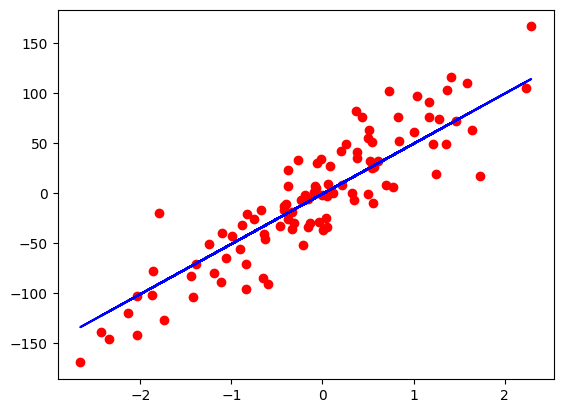

In [7]:
# Linear Regression
# Making the model
# Defining the Loss function, Optimizer
# Plotting of Data

import torch
import torch.nn as nn
import numpy   as np
from   sklearn import datasets
import matplotlib.pyplot as plt

X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1, noise=30, random_state=2)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)  # This step is important as it converts the data in thr ([[a],[b]]) format


n_samples, n_features = X.shape
input_size = n_features
output_size = 1
print(n_features)
model = nn.Linear(input_size, output_size)

learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 100
for epoch in range(num_epochs):
  y_pred = model(X)
  loss = criterion(y_pred,y)

  loss.backward()
  optimizer.step()

  optimizer.zero_grad()

  if(epoch%10==0):
    print(loss)


y_pred = model(X).detach().numpy()
plt.plot(X_numpy,y_numpy, 'ro')
plt.plot(X_numpy,y_pred, 'b')
plt.show()



epoch: 10, loss = 4012.5867
epoch: 20, loss = 2829.2053
epoch: 30, loss = 2022.3766
epoch: 40, loss = 1472.1647
epoch: 50, loss = 1096.8743
epoch: 60, loss = 840.8431
epoch: 70, loss = 666.1392
epoch: 80, loss = 546.9058
epoch: 90, loss = 465.5154
epoch: 100, loss = 409.9467


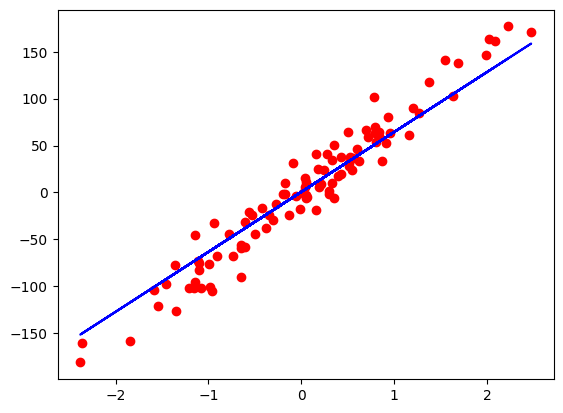

In [23]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()